In [10]:
LSTM_precision = [0.995708154506, 0.975659229209, 0.960079840319, 0.975609756098, 0.987525987526, 0.954365079365, 0.981443298969, 0.928709055877, 0.981481481481, 0.979633401222]
GRU_precision = [0.991683991684, 0.962151394422, 0.954455445545, 0.987654320988, 0.977596741344, 0.967806841046, 0.977459016393, 0.979508196721, 0.995798319328, 0.981632653061]

## RNN1 10-fold Cross Validation

<Container object of 10 artists>

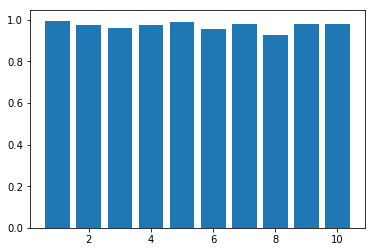

In [11]:
i = list(range(1,11))

import matplotlib.pyplot as plt
%matplotlib inline

plt.bar(i, LSTM_precision)

<Container object of 10 artists>

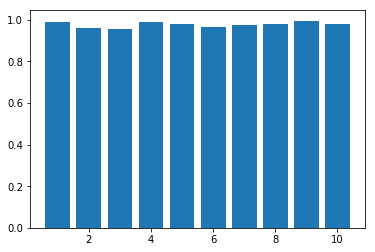

In [12]:
plt.bar(i, GRU_precision)

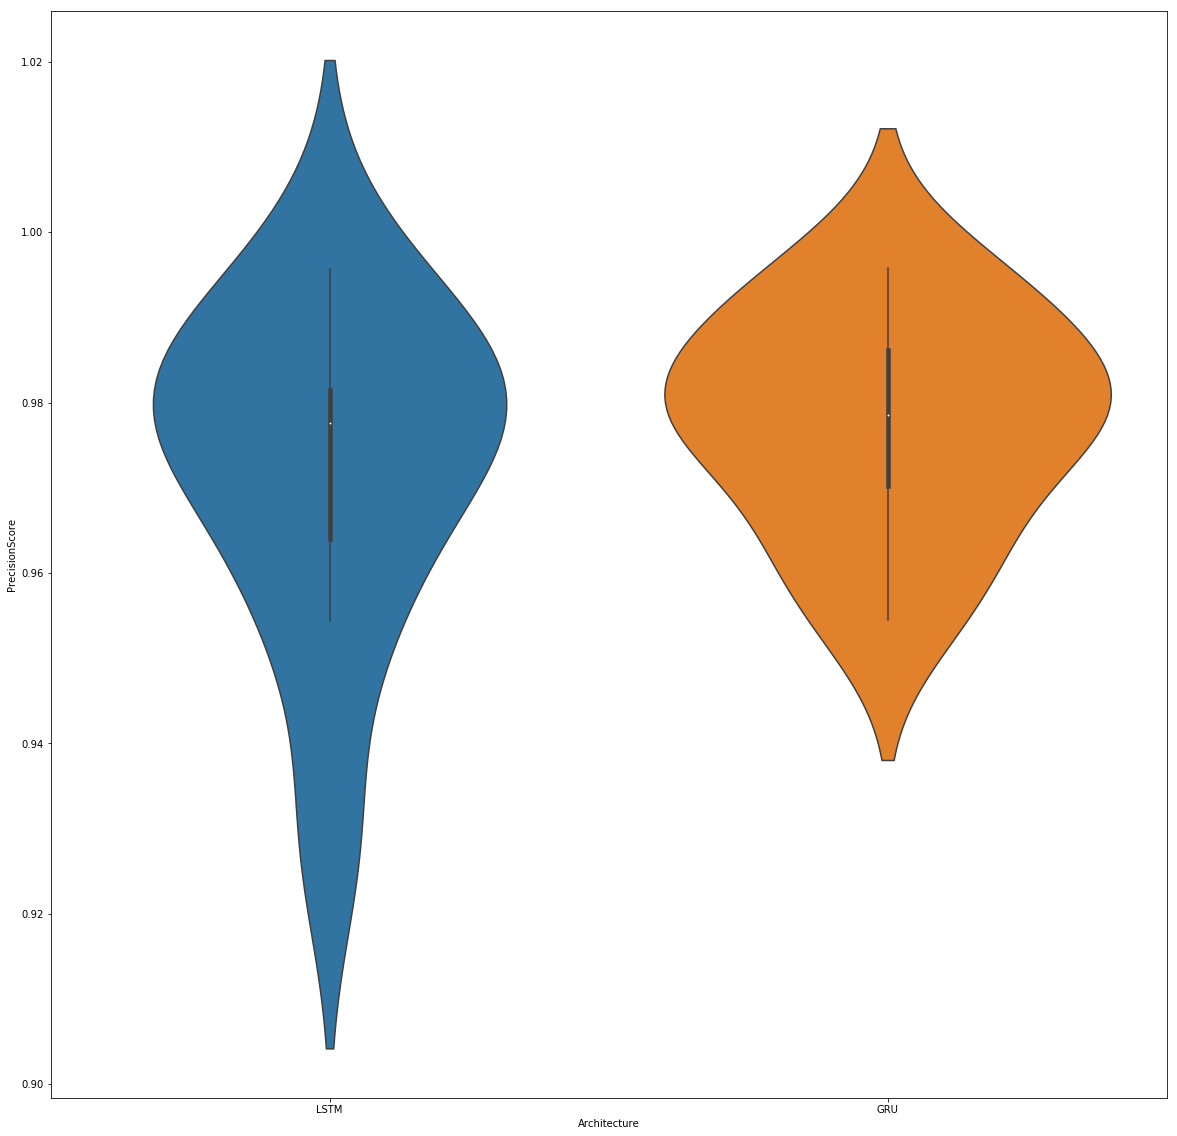

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

df_both = pd.DataFrame([['LSTM', 0.995708154506], ['LSTM', 0.975659229209], ['LSTM', 0.960079840319], ['LSTM', 0.975609756098],  ['LSTM', 0.987525987526], ['LSTM', 0.954365079365], ['LSTM', 0.981443298969], ['LSTM', 0.928709055877], ['LSTM', 0.981481481481], ['LSTM', 0.979633401222],
                       ['GRU', 0.991683991684], ['GRU', 0.962151394422], ['GRU', 0.954455445545], ['GRU', 0.987654320988], ['GRU', 0.977596741344], ['GRU', 0.967806841046], ['GRU', 0.977459016393], ['GRU', 0.979508196721], ['GRU', 0.995798319328], ['GRU', 0.981632653061]], columns=['Architecture', 'PrecisionScore'])

f, ax = plt.subplots(figsize=(20, 20))

sns.violinplot(x=df_both.Architecture, y=df_both.PrecisionScore)




LSTM's were originally developed to deal with exploding and vanishing gradient issues when training traditional RNNs. The 

## Heatmaps

In [28]:
import seaborn as sns
import pandas as pd

# Transposed because we were working remote; programatically doing this 
# is not possible due to memory persistence

# In order: [top left, top right, bottom left, bottom right]
LSTM_confusion_matrices = [
    [73, 2, 19, 464],
    [63, 12, 2, 481],
    [55, 20, 2, 481],
    [63, 12, 3, 480],
    [69, 6, 8, 475],
    [52, 23, 1, 481],
    [66, 9, 6, 476],
    [37, 37, 0, 482],
    [65, 9, 5, 477],
    [64, 10, 1, 481],
]

GRU_confusion_matrices = [
    [71, 4, 6, 477],
    [56, 19, 0, 483],
    [52, 23, 1, 482],
    [69, 6, 3, 480],
    [64, 11, 3, 480],
    [59, 16, 1, 481],
    [64, 11, 5, 477],
    [64, 10, 4, 478],
    [72, 2, 8, 474],
    [65, 9, 1, 481],
]

LSTM_true_pos_ct = 0
LSTM_false_pos_ct = 0 
LSTM_false_neg_ct = 0
LSTM_true_neg_ct = 0

GRU_true_pos_ct = 0
GRU_false_pos_ct = 0 
GRU_false_neg_ct = 0
GRU_true_neg_ct = 0

for i in LSTM_confusion_matrices:
    LSTM_true_pos_ct += i[0]
    LSTM_false_pos_ct += i[1]
    LSTM_false_neg_ct += i[2]
    LSTM_true_neg_ct += i[3]
    
for i in GRU_confusion_matrices:
    GRU_true_pos_ct += i[0]
    GRU_false_pos_ct += i[1]
    GRU_false_neg_ct += i[2]
    GRU_true_neg_ct += i[3]
    
    
LSTM_true_pos_pct = (LSTM_true_pos_ct / (LSTM_true_pos_ct + LSTM_false_pos_ct))
LSTM_false_neg_pct = (LSTM_false_pos_ct / (LSTM_true_pos_ct + LSTM_false_pos_ct))
LSTM_false_pos_pct = (LSTM_false_neg_ct / (LSTM_true_neg_ct + LSTM_false_neg_ct))
LSTM_true_neg_pct = (LSTM_true_neg_ct / (LSTM_true_neg_ct + LSTM_false_neg_ct))

GRU_true_pos_pct = (GRU_true_pos_ct / (GRU_true_pos_ct + GRU_false_pos_ct))
GRU_false_neg_pct = (GRU_false_pos_ct / (GRU_true_pos_ct + GRU_false_pos_ct))
GRU_false_pos_pct = (GRU_false_neg_ct / (GRU_true_neg_ct + GRU_false_neg_ct))
GRU_true_neg_pct = (GRU_true_neg_ct / (GRU_true_neg_ct + GRU_false_neg_ct))
    
print(LSTM_true_pos_pct)
print(LSTM_false_neg_pct)
print(LSTM_false_pos_pct)
print(LSTM_true_neg_pct)

print()

print(GRU_true_pos_pct)
print(GRU_false_neg_pct)
print(GRU_false_pos_pct)
print(GRU_true_neg_pct)

0.8125836680053548
0.18741633199464525
0.009740932642487047
0.9902590673575129

0.8514056224899599
0.14859437751004015
0.006632124352331606
0.9933678756476684


In [47]:
# come back later
LSTM_conf_pct = [
    [0.8125836680053548, 0.18741633199464525],
    [0.009740932642487047, 0.9902590673575129]
]

GRU_conf_pct = [
    [0.8514056224899599, 0.14859437751004015],
    [0.006632124352331606, 0.9933678756476684]
]

class_labels = ["Ham", "Spam"]

df_LSTM = pd.DataFrame(LSTM_conf_pct, columns=[i for i in class_labels],
                  index=[i for i in class_labels])

df_GRU = pd.DataFrame(GRU_conf_pct, columns=[i for i in class_labels],
                  index=[i for i in class_labels])

### Heatmap of LSTM

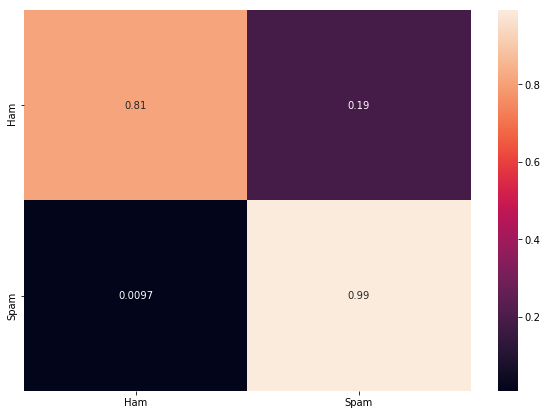

In [48]:
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

### Heatmap of GRU

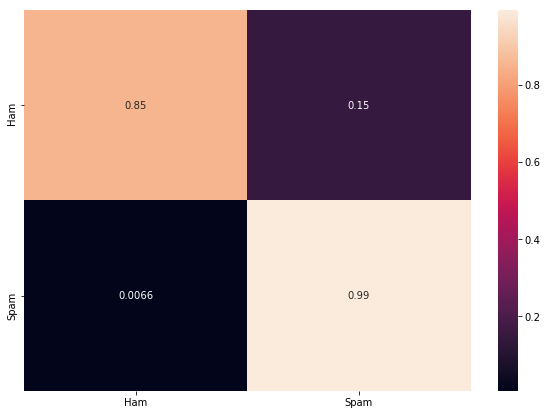

In [49]:
plt.figure(figsize = (10,7))
sns.heatmap(df_GRU, annot=True)